## Math 157: Intro to Mathematical Software
## UC San Diego, winter 2018

## March 7, 2018: Julia (part 3 of 3)

Administrivia:

- CAPE evaluations are available! They close Monday, March 19 at 8am. Since this course is highly experimental, your feedback will be very helpful for shaping future offerings.
- Thomas's office hours (usually Tuesday 11am-12pm) are moved to Friday 11:30am-12:50pm.
- Peter's office hours (usually Wednesday 3-5pm) are moved to Wednesday 5-7pm. 
- There will be an extra virtual office hour Thursday 6-7pm.
 
Advance notice for week 10:
- No lectures on Monday, March 12 or Wednesday, March 14. You may wish to use this time to meet your final project group.
- There will be a lecture on Friday, March 16, on the topic of "Where to go from here?" This lecture will not be counted for course attendance; that is, the last lecture for which attendance counts is Friday, March 9.
- My office hours on Thursday, March 15 are cancelled. All other sections and office hours meet as scheduled.

### Final project news

- Both parts will be collected Sunday, March 18 at 8pm.
- The groups for part 2 have been assigned. See the file `final_project_groups.md` in the shared project; then contact your group members as soon as possible. (I have created workspaces and chat rooms which may help with this; these are described in the same file.)
- For part 1, problem 4b, instead of the exhaustive search, do random sampling with $10^4$ samples. Ditto for 4c.
- A significant portion of the lecture hour on Friday, March 9 will be devoted to questions about Part 1 of the final project. I would recommend having a look at Part 1 before Friday if you have not yet done so.

### The Nemo project

Since Julia was designed to be a general language for scientific computation, it does not include much of the functionality of a computer algebra system. In Python, we can remedy this by using Sage. Recently, the [Nemo project](http://www.nemocas.org/) was created to provide some (although for now only a little) of the same functionality in Julia.

In [45]:
using Nemo


Welcome to Nemo version 0.7.3

Nemo comes with absolutely no warranty whatsoever



In Nemo, mathematical objects are generally constructed by first constructing a *parent object* which represents the collection of all objects of a particular type. So for example, Nemo big integers are constructed using the special object `ZZ` which stands for the collection of all integers.

In [46]:
ZZ

Integer Ring

In [48]:
23455678^15

6270690073961791488

In [47]:
ZZ(23455678)^15

357865526951036277776151046050141172644498244064981619523667001448806919564814697587707949626796007199526060032

Some more examples from [this list](http://nemocas.github.io/Nemo.jl/latest/constructors.html):

In [50]:
QQ(23/45)^12

LoadError: [91mMethodError: no method matching (::Nemo.FlintRationalField)(::Float64)[0m
Closest candidates are:
  FlintRationalField([91m::Nemo.fmpq[39m) at /ext/julia/julia-0.6.2/share/julia/site/v0.6/Nemo/src/flint/fmpq.jl:776
  FlintRationalField([91m::Nemo.fmpz[39m, [91m::Nemo.fmpz[39m) at /ext/julia/julia-0.6.2/share/julia/site/v0.6/Nemo/src/flint/fmpq.jl:774
  FlintRationalField([91m::Nemo.fmpz[39m) at /ext/julia/julia-0.6.2/share/julia/site/v0.6/Nemo/src/flint/fmpq.jl:766
  ...[39m

In [49]:
# Rational number, specified by numerator and denominator
QQ(23, 45)^12

21914624432020321//68952523554931640625

In [51]:
# Integers mod n
ResidueRing(ZZ, 37)(2)^15 # Computing 2^15 mod 37

23

In [52]:
# Real numbers with specified precision
sqrt(RealField(200)(2))

[1.41421356237309504880168872420969807856967187537694807317668 +/- 1.63e-60]

By the way, real numbers in Nemo automatically handle interval arithmetic; that is, they keep track of error bounds as you carry out operations. This functionality is provided by the [Arb library](http://arblib.org/).

In [53]:
# Matrices with integer entries
S = MatrixSpace(ZZ, 10, 10)
S(rand(0:1,10,10))

[1 0 0 0 0 0 0 1 1 1]
[0 0 1 0 1 1 0 0 1 0]
[0 1 0 1 0 1 1 0 0 0]
[0 1 0 1 0 1 1 1 1 1]
[0 1 1 1 1 0 1 0 1 0]
[1 1 1 0 0 0 1 1 0 0]
[1 1 0 0 0 0 0 1 1 0]
[0 1 1 0 0 1 1 0 1 0]
[0 1 0 0 0 0 0 0 0 1]
[1 1 1 0 0 1 0 1 1 0]

In [57]:
# Polynomials with integer coefficients
S, x = PolynomialRing(ZZ, "x")
(x+1)^4

x^4+4*x^3+6*x^2+4*x+1

### Performance comparisons

Here is an example from the book [Julia High Performance](https://www.packtpub.com/application-development/julia-high-performance) by way of [Stack Overflow](https://stackoverflow.com/questions/44590882/compare-speed-python3-vs-julia). Switch to the Python 3 (Ubuntu Linux) kernel now.

In [1]:
import scipy as sp
import time

# Sum of 1/t^2 from t = 1 to n by using loops:
# --------------------------------------------
def pisum(w,n):
    u_sum = 0
    for vi in range(w):
        u_sum = 0
        for vj in range(1,n+1,1):
            u_sum += 1.0/(vj*vj)
    return u_sum

# Sum of 1/t^2 from t = 1 to n by using scipy functions:
# ------------------------------------------------------
def pisum1(w,n):
    for vi in range(w):
        vj = sp.arange(1,n+1,1)
        vj = sp.multiply(vj,vj)
        u_sum_sp = (sp.divide(sp.ones(n),vj)).sum()
    return u_sum_sp

# Sum of 1/t^2 from t = 1 to n by using scipy functions & calculating 
# the sum via pure python:
# -------------------------------------------------------------------
def pisum2(w,n):
    for vi in range(w):
        vj = sp.arange(1,n+1,1)
        vj = sp.multiply(vj,vj)
        u_sum_py = sum(sp.divide(sp.ones(n),vj))
    return u_sum_py


In [2]:
# Benchmarking the methods :
# ==========================   

w = 500 
n = 10000

# 1) Loops:
# ---------    
ta = time.clock()
u_sum_loops = pisum(w,n)
eltime_loops = time.clock() - ta

# 2) scipy:
# ---------
ta = time.clock()
u_sum_sp = pisum1(w,n)
eltime_sp= time.clock() - ta


# 3) scipy & sum via python:
# --------------------------
ta = time.clock()
u_sum_py = pisum2(w,n)
eltime_py= time.clock() - ta


In [3]:
row_format = '{:<35} {:<5} {:<}'
print("Overview calculation time:")
print("-"*50)
print(row_format.format("elapsed time using loops:","%.5f" % eltime_loops,"sec."))
print(row_format.format("elapsed time using scipy:","%.5f" % eltime_sp,"sec."))
print(row_format.format("elapsed time using python:","%.5f" % eltime_py,"sec."))

line1 = "sum loops:",u_sum_loops
line2 = "sum scipy:",u_sum_sp
line3 = "sum scipy and sum via python:",u_sum_py
row_format = '{:<29} {:<18}'
print("Overview Sum:")
print("-"*50)
print(row_format.format(*line1))
print(row_format.format(*line2))
print(row_format.format(*line3))


Overview calculation time:
--------------------------------------------------
elapsed time using loops:           0.86448 sec.
elapsed time using scipy:           0.03202 sec.
elapsed time using python:          0.61134 sec.
Overview Sum:
--------------------------------------------------
sum loops:                    1.6448340718480652
sum scipy:                    1.6448340718480603
sum scipy and sum via python: 1.6448340718480652


Now switch the kernel back to Julia.

In [6]:
# Wrong way

function pisum(w,n)
    u_sum = 0;
    for vi = 1:w
        u_sum = 0;
        for vj = 1:n
            u_sum += 1.0/(vj*vj);
        end
    end
    u_sum
end

@time u_sum = pisum(500,10000)

  0.172473 seconds (15.00 M allocations: 228.994 MiB, 9.09% gc time)


1.6448340718480652

In [3]:
# Right way

function pisum(w,n)
    u_sum = 0.0;
    for vi = 1:w
        u_sum = 0.0;
        for vj = 1:n
            u_sum += 1.0/(vj*vj);
        end
    end
    u_sum
end
@time u_sum = pisum(500,10000)

  0.021794 seconds (2.21 k allocations: 113.106 KiB)


1.6448340718480652

Note that the second approach is 2x faster than scipy and about 100x faster than basic Python; however, the first approach is no faster than basic Python. Why the discrepancy?

In [4]:
n = 10
u_sum = 0;
println(typeof(u_sum))
for vj = 1:n
   u_sum += 1.0/(vj*vj);
   println(typeof(u_sum))
end


Int64


Float64
Float64
Float64
Float64
Float64
Float64
Float64
Float64
Float64
Float64


Note that `u_sum` is originally created as an integer 0, and then at the first step it is converted to a floating-point 0. That doesn't seem like a big penalty to pay, and at runtime it isn't.

But remember that Julia's performance benefits derive from it having a just-in-time (JIT) compiler. The issue here is that the Julia compiler sees that this conversion is necessary and is forced to compile in a different (and less efficient) way because of this. This phenomenon is known as *type instability*.

The moral is that, while Julia attempts to make it easier to write efficient code, this is not entirely automatic; one must still pay some attention to the underlying structure of the language in order to make things not just run, but run efficiently.

Here is an example of a different issue.

In [7]:
w = 500
n = 10000
tic()
u_sum = 0.0;
for vi = 1:w
    u_sum = 0.0;
    for vj = 1:n
        u_sum += 1.0/(vj*vj);
    end
end
eltime = toc()

elapsed time: 0.992005493 seconds


0.992005493

What is going on here? I avoided type instability and I still have slow code.

This time, the issue is that the global scope does not allow type specificity. That is, anything time-sensitive should be done inside a function call.

See [this blog post](http://www.stochasticlifestyle.com/7-julia-gotchas-handle/) for other examples of easy traps to fall into when trying to write Julia code. 

### More examples

The page [Julia by Example](https://juliabyexample.helpmanual.io/) has some basic examples which might be of use when getting started with the language. Here are a few of them.

### Printing

In [9]:
# available number format characters are f, e, g, c, s, p, d:
# (pi is a predefined constant; however, since its type is 
# "MathConst" it has to be converted to a float to be formatted)
@printf "fix trailing precision: %0.3f\n" float(pi)
@printf "scientific form: %0.6e\n" 1000pi
# g is not implemented yet
@printf "a character: %c\n" 'α'
@printf "a string: %s\n" "look I'm a string!"
@printf "right justify a string: %50s\n" "width 50, text right justified!"
@printf "a pointer: %p\n" 100000000
@printf "print a integer: %d\n" 1e50


fix trailing precision: 3.142
scientific form: 3.141593e+03
a character: α
a string: look I'm a string!
right justify a string:                 

   width 50, text right justified!
a pointer: 0x0000000005f5e100
print a integer: 100000000000000007629769841091887003294964970946560


### Error handling

In [5]:
a=[]
# try, catch can be used to deal with errors as in Python
try
    pop!(a, 1) # Try changing this to create an error...
catch err
    println("hello")
    showerror(STDERR, err, backtrace())
    println()
end
println("Continuing after error")

hello

Continuing after error


MethodError: no method matching pop!(::Array{Any,1}, ::Int64)
Closest candidates are:
  pop!(::IntSet, ::Integer) at intset.jl:77
  pop!(::IntSet, ::Integer, ::Any) at intset.jl:80
  pop!(::ObjectIdDict, ::ANY) at associative.jl:445
  ...
Stacktrace:
 [1] backtrace() at ./error.jl:46
 [2] include_string(::String, ::String) at ./loading.jl:522
 [3] include_string(::Module, ::String, ::String) at /ext/julia/julia-0.6.2/share/julia/site/v0.6/Compat/src/Compat.jl:174
 [4] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /ext/julia/julia-0.6.2/share/julia/site/v0.6/IJulia/src/execute_request.jl:154
 [5] (::Compat.#inner#16{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /ext/julia/julia-0.6.2/share/julia/site/v0.6/Compat/src/Compat.jl:496
 [6] eventloop(::ZMQ.Socket) at /ext/julia/julia-0.6.2/share/julia/site/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335

### Plotting

Plotting is provided using an external package called Winston. (I don't know where the name comes from.)

In [6]:
using Winston

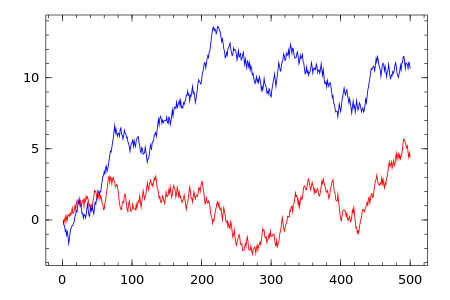

In [7]:
# plot some data
pl = plot(cumsum(rand(500) .- 0.5), "r", cumsum(rand(500) .- 0.5), "b")

In [8]:
# save the current figure
savefig("winston.svg")
# .eps, .pdf, & .png are also supported

### DataFrames

The DataFrames package does what you might expect. Let's get the irises dataset as a CSV from [here](https://forge.scilab.org/index.php/p/rdataset/source/tree/master/csv/datasets/iris.csv), then try the following.

In [9]:
using DataFrames

In [10]:
iris = readtable("iris.csv")
head(iris)

,x,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
1,1,5.1,3.5,1.4,0.2,setosa
2,2,4.9,3.0,1.4,0.2,setosa
3,3,4.7,3.2,1.3,0.2,setosa
4,4,4.6,3.1,1.5,0.2,setosa
5,5,5.0,3.6,1.4,0.2,setosa
6,6,5.4,3.9,1.7,0.4,setosa


In [11]:
# Check the names and element types of the columns of our new DataFrame
names(iris)

6-element Array{Symbol,1}:
 :x           
 :Sepal_Length
 :Sepal_Width 
 :Petal_Length
 :Petal_Width 
 :Species     

In [12]:
eltypes(iris)

6-element Array{Type,1}:
 Int64  
 Float64
 Float64
 Float64
 Float64
 String 

In [14]:
# Subset the DataFrame to only include rows for one species
head(iris[iris[:Species] .== "virginica", :])

,x,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
1,101,6.3,3.3,6.0,2.5,virginica
2,102,5.8,2.7,5.1,1.9,virginica
3,103,7.1,3.0,5.9,2.1,virginica
4,104,6.3,2.9,5.6,1.8,virginica
5,105,6.5,3.0,5.8,2.2,virginica
6,106,7.6,3.0,6.6,2.1,virginica


In [15]:
# Count the number of rows for each species
by(iris, :Species, df -> size(df, 1))

,Species,x1
1,setosa,50
2,versicolor,50
3,virginica,50


In [16]:
# Discretize entire columns at a time
iris[:Sepal_Length] = round.(Integer, iris[:Sepal_Length])
iris[:Sepal_Width] = round.(Integer, iris[:Sepal_Width])
head(iris)

,x,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
1,1,5,4,1.4,0.2,setosa
2,2,5,3,1.4,0.2,setosa
3,3,5,3,1.3,0.2,setosa
4,4,5,3,1.5,0.2,setosa
5,5,5,4,1.4,0.2,setosa
6,6,5,4,1.7,0.4,setosa


In [17]:
# Tabulate data according to discretized columns to see "clusters"
tabulated = by(
    iris,
    [:Species, :Sepal_Length, :Sepal_Width],
    df -> size(df, 1)
)
head(tabulated)

,Species,Sepal_Length,Sepal_Width,x1
1,setosa,4,2,1
2,setosa,4,3,4
3,setosa,5,3,23
4,setosa,5,4,17
5,setosa,6,4,5
6,versicolor,5,2,4


In [18]:
# you can setup a grouped dataframe like this
gdf = groupby(iris,[:Species, :Sepal_Length, :Sepal_Width])

# and then iterate over it
for idf in gdf
    println(size(idf,1))
end

1
4
23
17
5
4
2
9
27
8
1
3
24
1
14
1
4
2


In [19]:
# insert random numbers at col 5:
insert!(iris, 5, rand(nrow(iris)), :randCol)
head(iris)

,x,Sepal_Length,Sepal_Width,Petal_Length,randCol,Petal_Width,Species
1,1,5,4,1.4,0.8026071724221897,0.2,setosa
2,2,5,3,1.4,0.0672362243212501,0.2,setosa
3,3,5,3,1.3,0.9047488240846246,0.2,setosa
4,4,5,3,1.5,0.894682502870096,0.2,setosa
5,5,5,4,1.4,0.48978040091710096,0.2,setosa
6,6,5,4,1.7,0.44183816156777156,0.4,setosa


In [20]:
# remove it
delete!(iris, :randCol)
head(iris)

,x,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
1,1,5,4,1.4,0.2,setosa
2,2,5,3,1.4,0.2,setosa
3,3,5,3,1.3,0.2,setosa
4,4,5,3,1.5,0.2,setosa
5,5,5,4,1.4,0.2,setosa
6,6,5,4,1.7,0.4,setosa


### For more on Julia...

- The page [Julia by Example](https://juliabyexample.helpmanual.io/) has a few very basic examples which might be of use when getting started with the language.
- The page [Learning Julia](https://julialang.org/learning/) has a number of links to tutorials, videos, sample Jupyter notebooks, and even books on the topic.